In [ ]:
################################################################
#Multilayer Perceptron
#Author: Edwyn Javier Aldana
################################################################

#Load libraries
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.neural_network import MLPRegressor
from sklearn import metrics


Load Dataset

In [ ]:
######################################################
#Uncomment the block online or local depending your
#execution environment
######################################################
#Online
from google.colab import files
uploaded = files.upload()
import io
dataset = pd.read_csv(io.BytesIO(uploaded['Weather.csv']))

#Describe shape of the dataset
print(dataset.shape)
#View some statistics
dataset.describe()



Saving Weather.csv to Weather.csv


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(119040, 31)


,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,MAX,MIN,MEA,SND,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,118566.000000,118572.000000,118542.000000,5563.0,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,81.003745,64.273808,72.644843,0.0,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,14.869361,14.481498,14.211082,0.0,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,-28.000000,-37.000000,-32.000000,0.0,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,78.000000,59.000000,69.000000,0.0,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,85.000000,70.000000,78.000000,0.0,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,89.000000,74.000000,81.000000,0.0,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,122.000000,94.000000,104.000000,0.0,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


Feature Selection

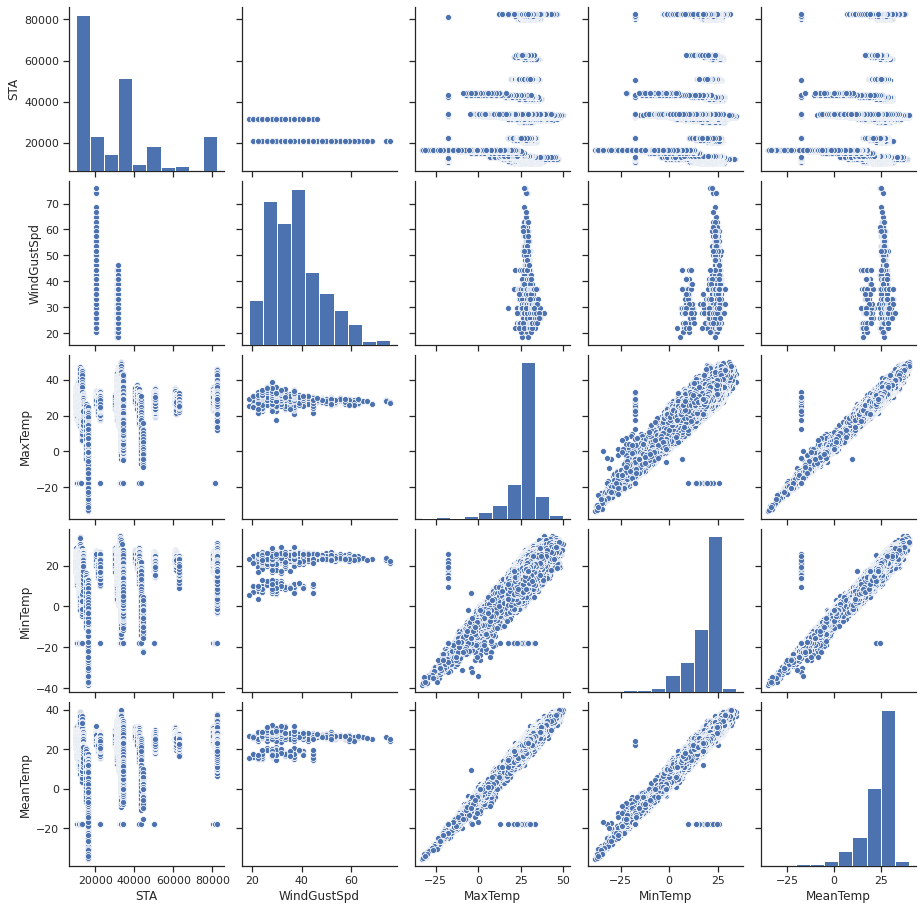

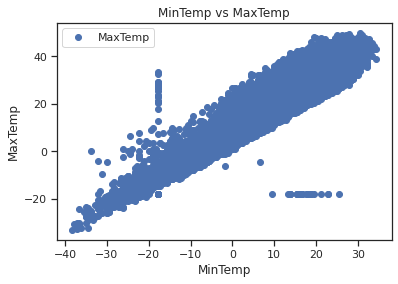

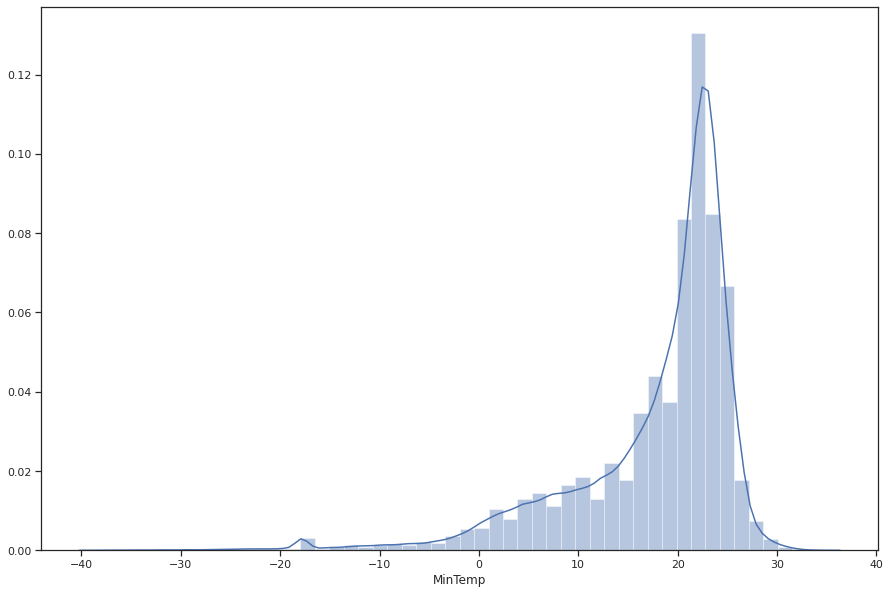

In [ ]:
seabornInstance.set(style="ticks", color_codes=True)
g = seabornInstance.pairplot(dataset.loc[:, 'STA':'MeanTemp'])

#View the relationship between MinTemp and MaxTemp
dataset.plot(x='MinTemp', y='MaxTemp', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

#View  the distribution of the variable MaxTemp
#Exercise: Change the code to obtain the distribution of MinTemp
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['MinTemp'])
plt.show()


Define predictors and response variables

In [ ]:
#Define the predictor and the output variable.
#This task depends on several assumptions based on experience, for instance, 
#It is possible assume (based on weather experts) that MaxTemp depens on MinTem.
#In other words, MaxTemp can be predicted by MinTemp
X = dataset['MinTemp'].values.reshape(-1,1) # Unknown rows, one column
y = dataset['MaxTemp'].values.reshape(-1,1) # Unknown rows, one column


array([[25.55555556],
       [28.88888889],
       [26.11111111],
       ...,
       [28.33333333],
       [28.33333333],
       [29.44444444]])

Define training and test datasets

In [ ]:
#Define the sizes of training set and test dataset, applying 80-20 criterion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



Training Process

In [ ]:
#Train the model
regressor =  MLPRegressor(hidden_layer_sizes=1,
                                 tol=1e-2, max_iter=500, random_state=0)
regressor.fit(X_train, y_train) #training the algorithm
#To retrieve the intercept:
print(regressor.coefs_)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[array([[0.38246069]]), array([[2.39686491]])]


Testing Process

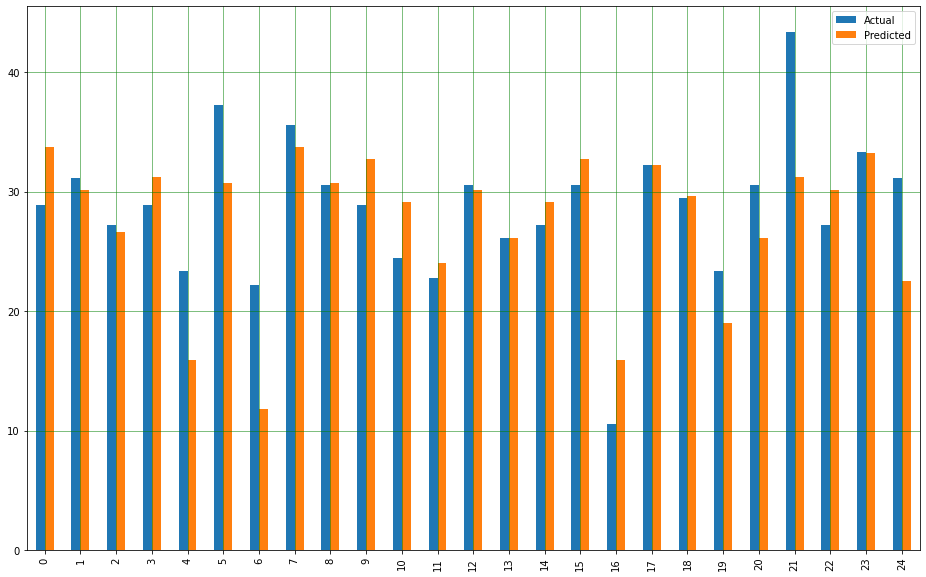

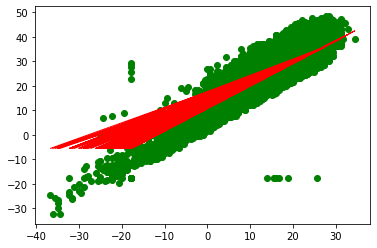

[[25.        ]
 [21.11111111]
 [17.22222222]
 ...
 [23.88888889]
 [21.66666667]
 [22.77777778]]


In [ ]:

#Make prediction based on the model using the test data
y_pred = regressor.predict(X_test)
y_pred=y_pred.reshape(-1,1)
#Visualize the efectiveness of the prediction
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df = df.head(25)
df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#Visualize the test dataset and the prediction
plt.scatter(X_test, y_test,  color='green')
plt.plot(X_test, y_pred, color='red', linewidth=1)
plt.plot()
plt.show()


print(X_test)

Evaluating the perfomance

In [ ]:

#Evaluate the model

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2',metrics.r2_score(y_test, y_pred))


Mean Absolute Error: 3.2271170283971338
Mean Squared Error: 17.99567896706261
Root Mean Squared Error: 4.2421314179387
R^2 0.7622106353655042


Evaluating Residuals